In [1]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 29.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [gensim]2m2/3 [gensim]

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install underthesea
!pip install pyvi


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 34.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pyvi]

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
# from underthesea import word_tokenize, pos_tag, sent_tokenize
from pyvi.ViTokenizer import tokenize
import warnings
from gensim import corpora, models, similarities
import re
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline

In [4]:
STOP_WORD_FILE = 'vietnamese-stopwords.txt'

In [5]:
with open(STOP_WORD_FILE, 'r', encoding='utf-8') as file:
    stop_words = file.read()

stop_words = stop_words.split('\n')

## 1) Load Dataset


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('data_motobikes.xlsx')  # hoặc file bạn upload
# Hiển thị 5 hàng đầu tiên để kiểm tra
print("5 hàng đầu tiên trước xử lý:")
display(df.head())

# Shape của data
print(f"Shape của data: {df.shape}")

print("Thông tin về các cột:")
print(df.info())

5 hàng đầu tiên trước xử lý:


,id,Tiêu đề,Giá,Khoảng giá min,Khoảng giá max,Địa chỉ,Mô tả chi tiết,Thương hiệu,Dòng xe,Năm đăng ký,Số Km đã đi,Tình trạng,Loại xe,Dung tích xe,Xuất xứ,Chính sách bảo hành,Trọng lượng,Href
0,1,"Bán Vespa Sprint 125cc 2024 xanh dương, xe đẹp...",66.000.000 đ,72.53 tr,85.14 tr,"Phường Bến Thành, Quận 1, Tp Hồ Chí Minh",Bán xe #Vespa Sprint 125cc. Mua mới tại #Topco...,Piaggio,Vespa,2024,14000,Đã sử dụng,Tay ga,100 - 175 cc,Đang cập nhật,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-quan-1-tp...
1,2,🔥🔥SH 150i Thắng ABS 2019 BSTP Chính Chủ,79.500.000 đ,62.76 tr,73.68 tr,"Phường Tân Định, Quận 1, Tp Hồ Chí Minh","_Bán SH 150i Thắng ABS 2019 Xám Bạc, Úp Team X...",Honda,SH,2019,28000,Đã sử dụng,Tay ga,100 - 175 cc,Đang cập nhật,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-quan-1-tp...
2,3,CC Vision Thể Thao 2023 Đen+bộ đèn Demi audi A7,37.000.000 đ,28 tr,32.86 tr,"Phường Cầu Kho, Quận 1, Tp Hồ Chí Minh",Chính chủ bán Vision phiên bản Thể Thao 2023 Đ...,Honda,Vision,2023,12000,Đã sử dụng,Tay ga,100 - 175 cc,Đang cập nhật,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-quan-1-tp...
3,4,Vespa Sprint 2019 -125- Đen Đỏ Sport -CHÍNH ...,45.000.000 đ,43.1 tr,50.6 tr,"Phường Bến Nghé, Quận 1, Tp Hồ Chí Minh",XE CÁ NHÂN BÁN - XE DO EM ĐỨNG TÊN CHÍNH C...,Piaggio,Vespa,2019,60000,Đã sử dụng,Tay ga,100 - 175 cc,Đang cập nhật,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-quan-1-tp...
4,5,Xe tay ga Yamaha Latte 125 – Đăng ký 2021,23.000.000 đ,17.02 tr,19.98 tr,"Phường Tân Định, Quận 1, Tp Hồ Chí Minh",🛵 Thông tin xe:\n\nDòng xe tay ga cao cấp Yama...,Yamaha,Latte,2021,24000,Đã sử dụng,Tay ga,100 - 175 cc,Nhật Bản,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-quan-1-tp...


Shape của data: (7208, 18)
Thông tin về các cột:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7208 entries, 0 to 7207
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   7208 non-null   int64 
 1   Tiêu đề              7207 non-null   object
 2   Giá                  7206 non-null   object
 3   Khoảng giá min       7006 non-null   object
 4   Khoảng giá max       7011 non-null   object
 5   Địa chỉ              7167 non-null   object
 6   Mô tả chi tiết       7208 non-null   object
 7   Thương hiệu          7205 non-null   object
 8   Dòng xe              7205 non-null   object
 9   Năm đăng ký          7208 non-null   object
 10  Số Km đã đi          7208 non-null   int64 
 11  Tình trạng           7208 non-null   object
 12  Loại xe              7208 non-null   object
 13  Dung tích xe         7208 non-null   object
 14  Xuất xứ              7208 non-null   object
 15  Chính 

In [7]:
# Xử lý cột 'Giá': Bỏ ' đ', loại dấu '.', chuyển thành float
def clean_price(x):
    if isinstance(x, str):  # Kiểm tra nếu là chuỗi
        x = x.replace('.', '').replace(' đ', '').strip()
        try:
            return float(x)
        except ValueError:
            return np.nan
    return x

# Xử lý cột 'Khoảng giá min' và 'Khoảng giá max': Chuyển '72.53 tr' -> 72530000 (giả sử 'tr' = triệu)
def clean_range(x):
    if isinstance(x, str):
        x = x.replace(' tr', '').replace(',', '.').strip()  # Bỏ ' tr', thay ',' thành '.' để float
        try:
            return float(x) * 1000000
        except ValueError:
            return np.nan
    return x

df['Giá'] = df['Giá'].apply(clean_price)
df['Khoảng giá min'] = df['Khoảng giá min'].apply(clean_range)
df['Khoảng giá max'] = df['Khoảng giá max'].apply(clean_range)

# Xử lý cột 'Năm đăng ký': Nếu 'trước năm 1980' thì thành 1980, chuyển thành int
def clean_year(x):
    if isinstance(x, str) and 'trước năm 1980' in x.lower():
        return 1980
    try:
        return int(x)
    except ValueError:
        return np.nan

df['Năm đăng ký'] = df['Năm đăng ký'].apply(clean_year)


In [8]:
# Xem kích thước và vài dòng đầu
print(df.shape)
df.head()

# Kiểm tra kiểu dữ liệu và giá trị null
df.info()

# Kiểm tra giá trị thiếu theo cột
df.isnull().sum()

# Thống kê đầy đủ cho tất cả cột (bao gồm categorical)
print("\nThống kê describe cho tất cả cột:")
display(df.describe(include='all'))

(7208, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7208 entries, 0 to 7207
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   7208 non-null   int64  
 1   Tiêu đề              7207 non-null   object 
 2   Giá                  7206 non-null   float64
 3   Khoảng giá min       7006 non-null   float64
 4   Khoảng giá max       7011 non-null   float64
 5   Địa chỉ              7167 non-null   object 
 6   Mô tả chi tiết       7208 non-null   object 
 7   Thương hiệu          7205 non-null   object 
 8   Dòng xe              7205 non-null   object 
 9   Năm đăng ký          7208 non-null   int64  
 10  Số Km đã đi          7208 non-null   int64  
 11  Tình trạng           7208 non-null   object 
 12  Loại xe              7208 non-null   object 
 13  Dung tích xe         7208 non-null   object 
 14  Xuất xứ              7208 non-null   object 
 15  Chính sách bảo hành  7207 n

,id,Tiêu đề,Giá,Khoảng giá min,Khoảng giá max,Địa chỉ,Mô tả chi tiết,Thương hiệu,Dòng xe,Năm đăng ký,Số Km đã đi,Tình trạng,Loại xe,Dung tích xe,Xuất xứ,Chính sách bảo hành,Trọng lượng,Href
count,7208.000000,7207,7.206000e+03,7.006000e+03,7.011000e+03,7167,7208,7205,7205,7208.000000,7208.000000,7208,7208,7208,7208,7207,7207,7208
unique,NaN,6839,NaN,NaN,NaN,310,7183,37,195,NaN,NaN,2,3,7,12,1,1,7196
top,NaN,Bán xe,NaN,NaN,NaN,"Phường Bình Hưng Hoà A, Quận Bình Tân, Tp Hồ C...",Mình cần bán xe như hình \nXe giấy tờ đầy đủ n...,Honda,Wave,NaN,NaN,Đã sử dụng,Tay ga,100 - 175 cc,Việt Nam,Bảo hành hãng,> 50 kg,https://xe.chotot.com/mua-ban-xe-may-huyen-nha...
freq,NaN,29,NaN,NaN,NaN,113,10,4374,727,NaN,NaN,7207,3600,5857,2875,7207,7207,3
mean,3604.500000,NaN,4.924194e+07,2.390171e+07,2.805974e+07,NaN,NaN,NaN,NaN,2013.721143,64378.889012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2080.914703,NaN,1.603077e+09,2.992946e+07,3.512554e+07,NaN,NaN,NaN,NaN,7.865770,136573.455355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,0.000000e+00,1.230000e+06,1.440000e+06,NaN,NaN,NaN,NaN,1980.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1802.750000,NaN,8.500000e+06,7.980000e+06,9.370000e+06,NaN,NaN,NaN,NaN,2010.000000,10000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3604.500000,NaN,1.650000e+07,1.453000e+07,1.705000e+07,NaN,NaN,NaN,NaN,2015.000000,28000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,5406.250000,NaN,3.250000e+07,2.832000e+07,3.325000e+07,NaN,NaN,NaN,NaN,2019.000000,53327.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Infer categorical/numeric columns
categorical_cols = [c for c in df.columns if df[c].dtype == 'object' or str(df[c].dtype).startswith('category')]
numeric_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
print("\nCategorical columns:", categorical_cols)
print("Numeric columns:", numeric_cols)


Categorical columns: ['Tiêu đề', 'Địa chỉ', 'Mô tả chi tiết', 'Thương hiệu', 'Dòng xe', 'Tình trạng', 'Loại xe', 'Dung tích xe', 'Xuất xứ', 'Chính sách bảo hành', 'Trọng lượng', 'Href']
Numeric columns: ['id', 'Giá', 'Khoảng giá min', 'Khoảng giá max', 'Năm đăng ký', 'Số Km đã đi']


## 2) Data cleaning, remove outliers, fill/flag missing

In [10]:
# Sao chép dữ liệu tránh mất gốc
df_clean = df.copy()

# Quy tắc IQR cho cột "Giá"
Q1 = df_clean['Giá'].quantile(0.25)
Q3 = df_clean['Giá'].quantile(0.75)
IQR = Q3 - Q1

# Giữ lại những giá trong khoảng hợp lý
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Ngưỡng dưới: {lower_bound:,.0f} - Ngưỡng trên: {upper_bound:,.0f}")

df_clean = df_clean[(df_clean['Giá'] >= lower_bound) & (df_clean['Giá'] <= upper_bound)]
print(f"Số xe còn lại sau khi loại outlier: {len(df_clean)} / {len(df)}")

Ngưỡng dưới: -27,500,000 - Ngưỡng trên: 68,500,000
Số xe còn lại sau khi loại outlier: 6546 / 7208


In [11]:
# Với biến số (numerical): dùng median để tránh bị lệch do outlier

for col in numeric_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Với biến phân loại (categorical): điền "Khác" hoặc "Không rõ"
for col in categorical_cols:
    df_clean[col] = df_clean[col].fillna('Không rõ')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6546 entries, 0 to 7206
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   6546 non-null   int64  
 1   Tiêu đề              6546 non-null   object 
 2   Giá                  6546 non-null   float64
 3   Khoảng giá min       6546 non-null   float64
 4   Khoảng giá max       6546 non-null   float64
 5   Địa chỉ              6546 non-null   object 
 6   Mô tả chi tiết       6546 non-null   object 
 7   Thương hiệu          6546 non-null   object 
 8   Dòng xe              6546 non-null   object 
 9   Năm đăng ký          6546 non-null   int64  
 10  Số Km đã đi          6546 non-null   int64  
 11  Tình trạng           6546 non-null   object 
 12  Loại xe              6546 non-null   object 
 13  Dung tích xe         6546 non-null   object 
 14  Xuất xứ              6546 non-null   object 
 15  Chính sách bảo hành  6546 non-null   object

In [12]:
df_clean['Giá'] = df_clean['Giá'].astype(float)
df_clean['Khoảng giá min'] = df_clean['Khoảng giá min'].astype(float)
df_clean['Khoảng giá max'] = df_clean['Khoảng giá max'].astype(float)
df_clean['Năm đăng ký'] = df_clean['Năm đăng ký'].astype(int)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6546 entries, 0 to 7206
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   6546 non-null   int64  
 1   Tiêu đề              6546 non-null   object 
 2   Giá                  6546 non-null   float64
 3   Khoảng giá min       6546 non-null   float64
 4   Khoảng giá max       6546 non-null   float64
 5   Địa chỉ              6546 non-null   object 
 6   Mô tả chi tiết       6546 non-null   object 
 7   Thương hiệu          6546 non-null   object 
 8   Dòng xe              6546 non-null   object 
 9   Năm đăng ký          6546 non-null   int64  
 10  Số Km đã đi          6546 non-null   int64  
 11  Tình trạng           6546 non-null   object 
 12  Loại xe              6546 non-null   object 
 13  Dung tích xe         6546 non-null   object 
 14  Xuất xứ              6546 non-null   object 
 15  Chính sách bảo hành  6546 non-null   object

## 3) Data visualization

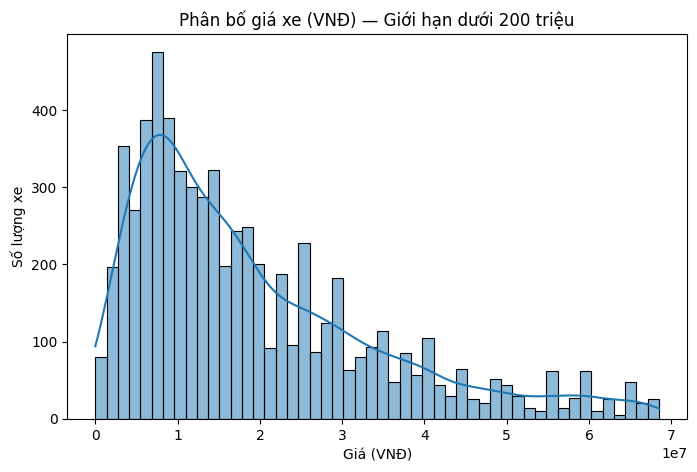

Thống kê mô tả giá:
count         6,546
mean     19,200,733
std      15,042,407
min               0
25%       8,000,000
50%      15,000,000
75%      26,900,000
max      68,500,000
Name: Giá, dtype: object


In [13]:
#Phân tích 'Giá'
plt.figure(figsize=(8,5))
sns.histplot(df_clean['Giá'], bins=50, kde=True)
plt.title("Phân bố giá xe (VNĐ) — Giới hạn dưới 200 triệu")
plt.xlabel("Giá (VNĐ)")
plt.ylabel("Số lượng xe")
plt.show()

print("Thống kê mô tả giá:")
print(df_clean['Giá'].describe().apply(lambda x: format(x, ',.0f')))

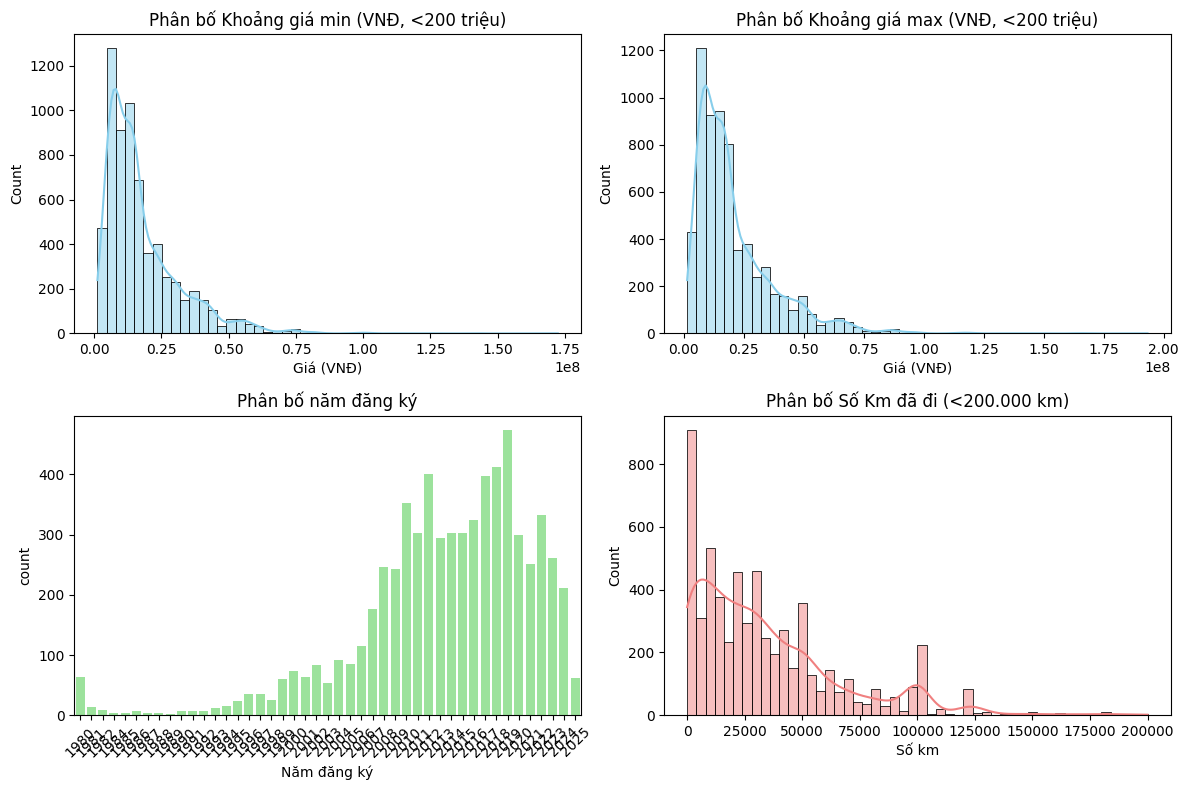

In [14]:
numeric_cols = ['Khoảng giá min', 'Khoảng giá max', 'Năm đăng ký', 'Số Km đã đi']

plt.figure(figsize=(12,8))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)

    data = df_clean[col].dropna()

    # Nếu cột là dạng giá hoặc km => giới hạn trục để tránh outlier quá lớn
    if col in ['Khoảng giá min', 'Khoảng giá max']:
        data = data[data < 2e8]  # chỉ lấy dưới 200 triệu
        sns.histplot(data, kde=True, bins=50, color='skyblue')
        plt.title(f'Phân bố {col} (VNĐ, <200 triệu)')
        plt.xlabel('Giá (VNĐ)')

    elif col == 'Số Km đã đi':
        data = data[data < 2e5]  # dưới 200,000 km
        sns.histplot(data, kde=True, bins=50, color='lightcoral')
        plt.title(f'Phân bố {col} (<200.000 km)')
        plt.xlabel('Số km')

    elif col == 'Năm đăng ký':
        sns.countplot(x=data, color='lightgreen', order=sorted(df_clean['Năm đăng ký'].unique()))
        plt.title('Phân bố năm đăng ký')
        plt.xlabel('Năm đăng ký')
        plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

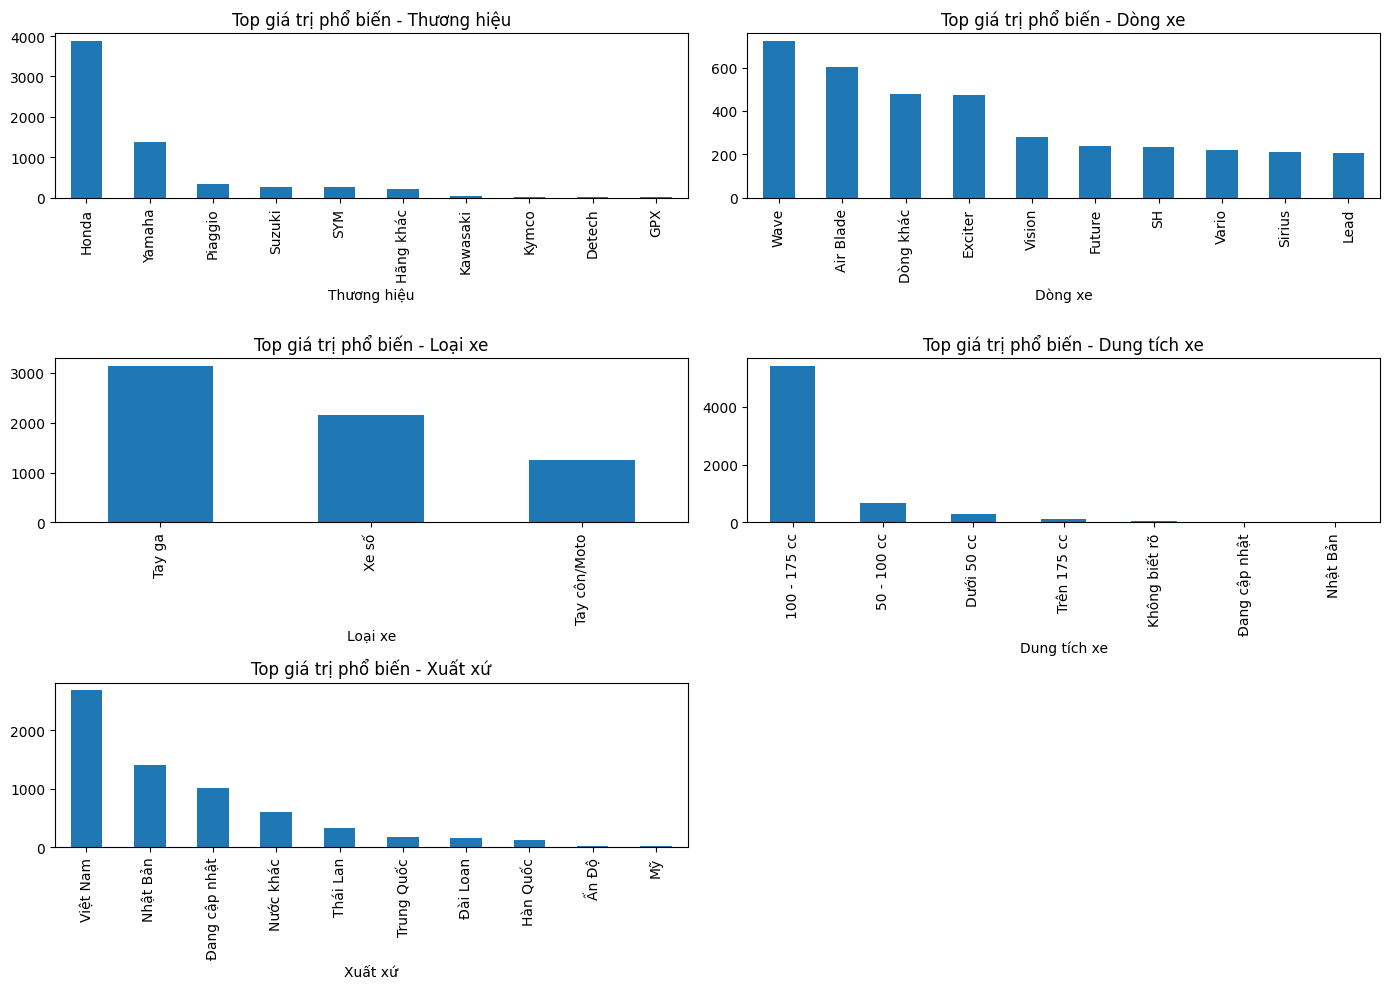

In [15]:
#Hiểu sự phổ biến của thương hiệu, loại xe, xuất xứ, tình trạng…
cat_cols = ['Thương hiệu', 'Dòng xe', 'Loại xe', 'Dung tích xe', 'Xuất xứ']

plt.figure(figsize=(14,10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, i)
    df_clean[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Top giá trị phổ biến - {col}')
plt.tight_layout()
plt.show()

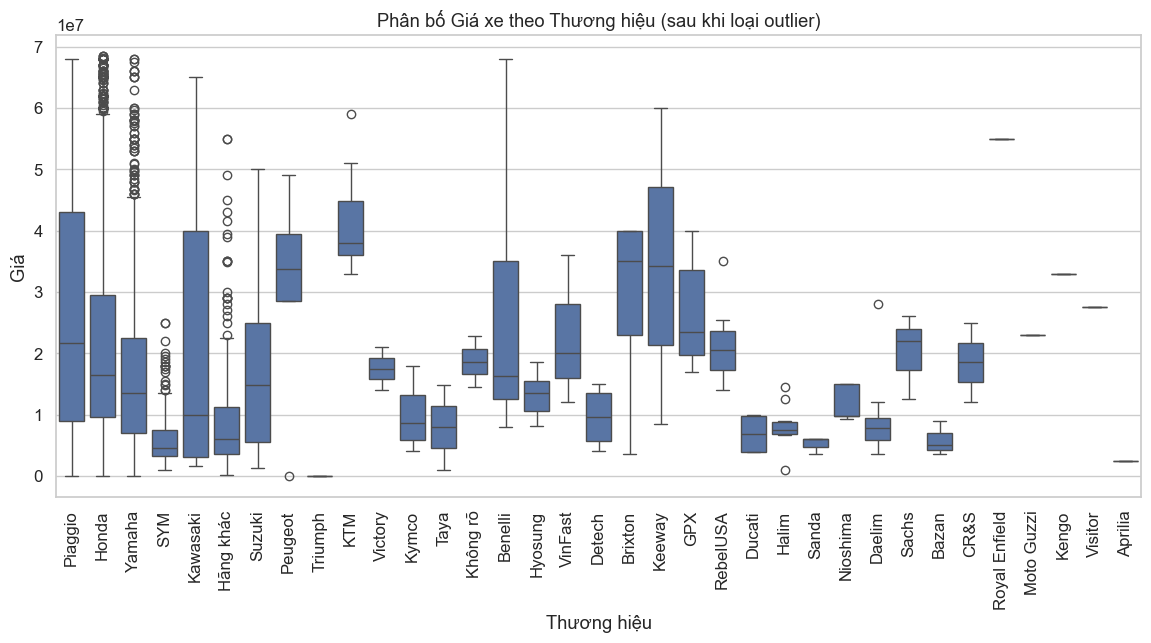

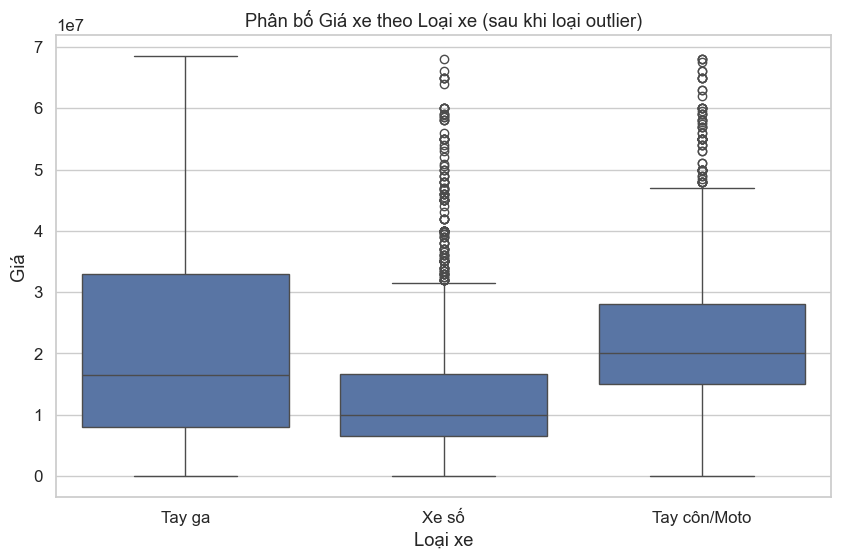

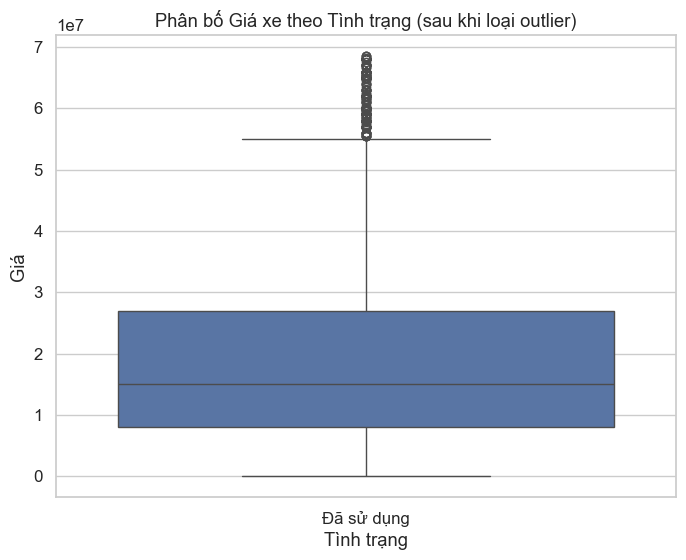

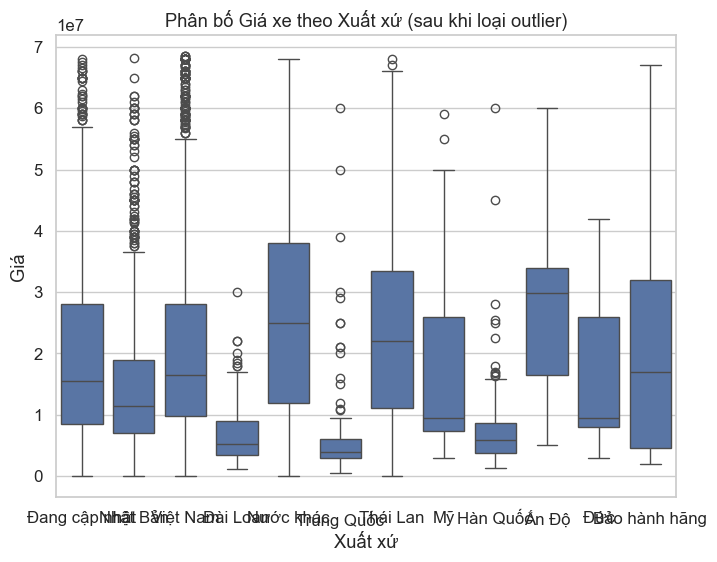

In [16]:
sns.set(style="whitegrid", font_scale=1.1)

# 1️⃣ Boxplot theo Thương hiệu
plt.figure(figsize=(14, 6))
sns.boxplot(x='Thương hiệu', y='Giá', data=df_clean)
plt.xticks(rotation=90)
plt.title('Phân bố Giá xe theo Thương hiệu (sau khi loại outlier)')
plt.show()

# 2️⃣ Boxplot theo Loại xe
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loại xe', y='Giá', data=df_clean)
plt.title('Phân bố Giá xe theo Loại xe (sau khi loại outlier)')
plt.show()

# 3️⃣ Boxplot theo Tình trạng
plt.figure(figsize=(8, 6))
sns.boxplot(x='Tình trạng', y='Giá', data=df_clean)
plt.title('Phân bố Giá xe theo Tình trạng (sau khi loại outlier)')
plt.show()

# 4️⃣ Boxplot theo Xuất xứ
plt.figure(figsize=(8, 6))
sns.boxplot(x='Xuất xứ', y='Giá', data=df_clean)
plt.title('Phân bố Giá xe theo Xuất xứ (sau khi loại outlier)')
plt.show()

In [17]:
CURRENT_YEAR = 2025
df_clean['Tuổi của xe'] = CURRENT_YEAR - df_clean['Năm đăng ký']

# Feature Engineering

In [18]:
df_fe = df_clean.copy()

In [19]:
stop_words

# Hàm chuẩn hóa text cơ bản
def normalize_text(text):
    if not isinstance(text, str):
        return ''  # Nếu không phải string, trả về empty
    text = text.lower()  # Chuyển lowercase
    text = re.sub(r'\W+', ' ', text)  # Thay ký tự đặc biệt bằng space (giữ chữ cái/số)
    text = re.sub(r'\s+', ' ', text)  # Loại bỏ space thừa
    # Optional: Remove stop words (tiếng Việt - cần custom list vì NLTK chủ yếu tiếng Anh; ở đây dùng tiếng Anh làm ví dụ)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text.strip()

text_cols = ['Tiêu đề', 'Mô tả chi tiết', 'Thương hiệu', 'Địa chỉ', 'Dòng xe']  # Chọn cột cần normalize
for col in text_cols:
    df_fe[col + '_normalized'] = df_fe[col].apply(normalize_text)

print("\nSample sau chuẩn hóa văn bản:")
print(df_fe[['Tiêu đề', 'Tiêu đề_normalized']].head(10))
print(df_fe[['Mô tả chi tiết', 'Mô tả chi tiết_normalized']].head(10))


Sample sau chuẩn hóa văn bản:
                                              Tiêu đề  \
0   Bán Vespa Sprint 125cc 2024 xanh dương, xe đẹp...   
2     CC Vision Thể Thao 2023 Đen+bộ đèn Demi audi A7   
3   Vespa Sprint 2019 -125- Đen Đỏ Sport -CHÍNH ...   
4           Xe tay ga Yamaha Latte 125 – Đăng ký 2021   
5     Xe hoc sinh di hoc nay có bằng lái muốn bán lại   
6                                   xe Air Blade 2013   
7                  Bán Xe Wave HQ up dàn áo leng keng   
8          cần bán xe để đối xe nên để giá yêu thương   
9        Xe honda Lead 2020 BSTP bản giới hạn đèn Led   
10                       Bán gấp Kawasaki gpz400 1973   

                               Tiêu đề_normalized  
0    vespa sprint 125cc 2024 xanh dương xe đẹp 95  
2    cc vision thể thao 2023 đen đèn demi audi a7  
3   vespa sprint 2019 125 đen đo sport chi nh chu  
4             xe ga yamaha latte 125 đăng ký 2021  
5                          xe hoc sinh di hoc lái  
6                            

In [20]:
# Kết hợp text cols thành một cột duy nhất cho vectorization
df_fe['Text_combined'] = df_fe['Tiêu đề_normalized'] + ' ' + df_fe['Mô tả chi tiết_normalized'] + ' ' + df_fe['Thương hiệu_normalized'] + ' ' + df_fe['Địa chỉ_normalized'] + ' ' + df_fe['Dòng xe_normalized']
df_fe['Text_combined']

0       vespa sprint 125cc 2024 xanh dương xe đẹp 95 x...
2       cc vision thể thao 2023 đen đèn demi audi a7 c...
3       vespa sprint 2019 125 đen đo sport chi nh chu ...
4       xe ga yamaha latte 125 đăng ký 2021 thông xe d...
5       xe hoc sinh di hoc lái xe cup 50cc không lái c...
                              ...                        
7202    xe vecpa giá tốt xe vecpa màu xanh sử dụng giá...
7203    xe vario xe mua chủ 2024 chạy 1000km xe bao zi...
7204    xe lead 110 tất zin e mua xe lead 12tr 1 giáo ...
7205    xe yamaha janus 2017 fi smart key màu xanh xe ...
7206    xe future đời đầu chủ xe cũ đẹp liền lạc xe ch...
Name: Text_combined, Length: 6546, dtype: object

In [21]:
tfidf_max_features = 1000  # Giới hạn features để tránh overfit
tfidf_ngram = (1, 2)  # Unigram + bigram cho capture phrase như "air blade"
svd_n_components = 100  # Giảm xuống 100 dims; nếu data nhỏ, set None

tfidf = TfidfVectorizer(
    max_features=tfidf_max_features,
    ngram_range=tfidf_ngram,
    min_df=2,  # Lọc từ hiếm
    analyzer='word',  # Phân tích word (kết hợp với tokenized)
    stop_words=list(stop_words)  # Dùng list stop_words_vi
)

# Fit transform trên 'Text_combined' (string) hoặc 'Text_combined_wt' (list) – TF-IDF chấp nhận cả hai, nhưng string ổn hơn với analyzer='word'
X_text_tfidf = tfidf.fit_transform(df_fe['Text_combined'].fillna(''))  # Sử dụng string để TF-IDF tự tokenize

# Giảm chiều với SVD nếu set
X_text_reduced = None
svd = None
if svd_n_components is not None and svd_n_components > 0:
    svd = TruncatedSVD(n_components=svd_n_components, random_state=42)
    X_text_reduced = svd.fit_transform(X_text_tfidf)
    print(f"Shape sau SVD: {X_text_reduced.shape}")  # Kiểm tra

Shape sau SVD: (6546, 100)


In [22]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# --- CATEGORICAL FEATURES ---
cat_cols = ['Thương hiệu', 'Dòng xe', 'Loại xe', 'Dung tích xe', 'Xuất xứ']

le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    df_fe[col + '_label'] = le.fit_transform(df_fe[col].astype(str))
    le_dict[col] = le

df_fe

,id,Tiêu đề,Giá,Khoảng giá min,Khoảng giá max,Địa chỉ,Mô tả chi tiết,Thương hiệu,Dòng xe,Năm đăng ký,...,Mô tả chi tiết_normalized,Thương hiệu_normalized,Địa chỉ_normalized,Dòng xe_normalized,Text_combined,Thương hiệu_label,Dòng xe_label,Loại xe_label,Dung tích xe_label,Xuất xứ_label
0,1,"Bán Vespa Sprint 125cc 2024 xanh dương, xe đẹp...",66000000.0,72530000.0,85140000.0,"Phường Bến Thành, Quận 1, Tp Hồ Chí Minh",Bán xe #Vespa Sprint 125cc. Mua mới tại #Topco...,Piaggio,Vespa,2024,...,xe vespa sprint 125cc mua topcom 01 2024 xe ch...,piaggio,phường bến thành 1 tp hồ chí minh,vespa,vespa sprint 125cc 2024 xanh dương xe đẹp 95 x...,22,146,1,0,8
2,3,CC Vision Thể Thao 2023 Đen+bộ đèn Demi audi A7,37000000.0,28000000.0,32860000.0,"Phường Cầu Kho, Quận 1, Tp Hồ Chí Minh",Chính chủ bán Vision phiên bản Thể Thao 2023 Đ...,Honda,Vision,2023,...,chủ vision phiên thể thao 2023 đen xe mua hãng...,honda,phường cầu kho 1 tp hồ chí minh,vision,cc vision thể thao 2023 đen đèn demi audi a7 c...,10,148,1,0,8
3,4,Vespa Sprint 2019 -125- Đen Đỏ Sport -CHÍNH ...,45000000.0,43100000.0,50600000.0,"Phường Bến Nghé, Quận 1, Tp Hồ Chí Minh",XE CÁ NHÂN BÁN - XE DO EM ĐỨNG TÊN CHÍNH C...,Piaggio,Vespa,2019,...,xe ca nhân n xe đư ng chi nh chu chi tiê t hi ...,piaggio,phường bến nghé 1 tp hồ chí minh,vespa,vespa sprint 2019 125 đen đo sport chi nh chu ...,22,146,1,0,8
4,5,Xe tay ga Yamaha Latte 125 – Đăng ký 2021,23000000.0,17020000.0,19980000.0,"Phường Tân Định, Quận 1, Tp Hồ Chí Minh",🛵 Thông tin xe:\n\nDòng xe tay ga cao cấp Yama...,Yamaha,Latte,2021,...,thông xe dòng xe ga yamaha latte 125 máy tiết ...,yamaha,phường tân định 1 tp hồ chí minh,latte,xe ga yamaha latte 125 đăng ký 2021 thông xe d...,34,80,1,0,3
5,6,Xe hoc sinh di hoc nay có bằng lái muốn bán lại,7500000.0,7730000.0,9080000.0,"Phường Tân Định, Quận 1, Tp Hồ Chí Minh",Xe cup 50cc không cần bằng lái chay im không h...,SYM,Elegant,2018,...,xe cup 50cc không lái chay im không hao xăng đ...,sym,phường tân định 1 tp hồ chí minh,elegant,xe hoc sinh di hoc lái xe cup 50cc không lái c...,25,47,2,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7202,7203,bán xe vecpa giá tốt còn mới,45000000.0,38210000.0,44860000.0,"Xã Phước Kiển, Huyện Nhà Bè, Tp Hồ Chí Minh","cần bán xe vecpa màu xanh ,còn mới ít sử dụng ...",Piaggio,Vespa,2018,...,xe vecpa màu xanh sử dụng giá 1 nửa lh,piaggio,xã phước kiển huyện bè tp hồ chí minh,vespa,xe vecpa giá tốt xe vecpa màu xanh sử dụng giá...,22,146,1,0,7
7203,7204,Bán xe vario,39000000.0,36190000.0,42490000.0,"Xã Phước Kiển, Huyện Nhà Bè, Tp Hồ Chí Minh",Xe mua chính chủ 2024 mới chạy 1000km xe bao z...,Honda,Vario,2024,...,xe mua chủ 2024 chạy 1000km xe bao zin nhu cầu lh,honda,xã phước kiển huyện bè tp hồ chí minh,vario,xe vario xe mua chủ 2024 chạy 1000km xe bao zi...,10,143,1,0,4
7204,7205,Xe Lead 110 tất cả zin hết !,10000000.0,7250000.0,8510000.0,"Xã Phú Xuân, Huyện Nhà Bè, Tp Hồ Chí Minh",Trước e mua xe lead này hơn 12tr của 1 giáo ch...,Honda,Lead,2011,...,e mua xe lead 12tr 1 giáo giáo viên e thay lốp...,honda,xã phú xuân huyện bè tp hồ chí minh,lead,xe lead 110 tất zin e mua xe lead 12tr 1 giáo ...,10,81,1,0,3
7205,7206,Bán xe Yamaha Janus 2017 FI smart key màu xanh,13500000.0,12970000.0,15230000.0,"Thị trấn Nhà Bè, Huyện Nhà Bè, Tp Hồ Chí Minh","Bán xe Yamaha Janus 2017 FI smart key, màu xan...",Yamaha,Janus,2017,...,xe yamaha janus 2017 fi smart key màu xanh chủ...,yamaha,thị trấn bè huyện bè tp hồ chí minh,janus,xe yamaha janus 2017 fi smart key màu xanh xe ...,34,72,1,0,7


In [23]:
low_card_cols = ['Loại xe', 'Dung tích xe']
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe_features = ohe.fit_transform(df_fe[low_card_cols])
ohe_df = pd.DataFrame(ohe_features, columns=ohe.get_feature_names_out(), index=df_fe.index)

ohe_df

,Loại xe_Tay côn/Moto,Loại xe_Tay ga,Loại xe_Xe số,Dung tích xe_100 - 175 cc,Dung tích xe_50 - 100 cc,Dung tích xe_Dưới 50 cc,Dung tích xe_Không biết rõ,Dung tích xe_Nhật Bản,Dung tích xe_Trên 175 cc,Dung tích xe_Đang cập nhật
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7202,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7203,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7204,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7205,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df_fe = pd.concat([df_fe, ohe_df], axis=1)
print("\nCategorical Features added. New columns:", [col for col in df_fe.columns if '_label' in col or col.startswith('Loại xe_')])


Categorical Features added. New columns: ['Thương hiệu_label', 'Dòng xe_label', 'Loại xe_label', 'Dung tích xe_label', 'Xuất xứ_label', 'Loại xe_Tay côn/Moto', 'Loại xe_Tay ga', 'Loại xe_Xe số']


In [25]:
num_cols = ['Giá', 'Khoảng giá min', 'Khoảng giá max', 'Năm đăng ký', 'Số Km đã đi']

# Tỷ lệ giá so với khoảng (price ratio): Đo lường xe có "rẻ" hơn ước tính không
df_fe['Giá trung bình'] = (df_fe['Khoảng giá min'] + df_fe['Khoảng giá max']) / 2
df_fe['Tỷ lệ giá'] = df_fe['Giá'] / df_fe['Giá trung bình'].replace(0, np.nan)  # Tránh divide by zero

# Km per year: Mức sử dụng trung bình/năm
df_fe['Km per year'] = df_fe['Số Km đã đi'] / (df_fe['Tuổi của xe'] + 1e-5)  # +epsilon tránh zero

# Log transform cho skewed (Giá, Số Km thường positive skew)
df_fe['Giá_log'] = np.log1p(df_fe['Giá'])
df_fe['Số Km đã đi_log'] = np.log1p(df_fe['Số Km đã đi'])

# Fill NaN mới từ engineering (ví dụ: nếu Năm đăng ký NaN → Tuổi xe NaN)
new_num_cols = ['Tuổi của xe', 'Tỷ lệ giá', 'Km per year', 'Giá_log', 'Số Km đã đi_log']
df_fe[new_num_cols] = df_fe[new_num_cols].fillna(df_fe[new_num_cols].median())  # Impute median

scaler = StandardScaler()
df_fe[num_cols + new_num_cols] = scaler.fit_transform(df_fe[num_cols + new_num_cols])

In [26]:
print("\nNumerical Features added. Sample new features:")
print(df_fe[new_num_cols].head())


Numerical Features added. Sample new features:
   Tuổi của xe  Tỷ lệ giá  Km per year   Giá_log  Số Km đã đi_log
0    -1.338812  -0.364795    -0.025971  1.428307        -0.071506
2    -1.211611   0.210656    -0.025981  0.912433        -0.134257
3    -0.702809  -0.177411    -0.025976  1.086916         0.520928
4    -0.957210   0.252196    -0.025981  0.488651         0.147910
5    -0.575609  -0.281019    -0.025985 -0.510221         0.164529


In [27]:
print("\nAll Columns after Feature Engineering:", df_fe.columns.tolist())


All Columns after Feature Engineering: ['id', 'Tiêu đề', 'Giá', 'Khoảng giá min', 'Khoảng giá max', 'Địa chỉ', 'Mô tả chi tiết', 'Thương hiệu', 'Dòng xe', 'Năm đăng ký', 'Số Km đã đi', 'Tình trạng', 'Loại xe', 'Dung tích xe', 'Xuất xứ', 'Chính sách bảo hành', 'Trọng lượng', 'Href', 'Tuổi của xe', 'Tiêu đề_normalized', 'Mô tả chi tiết_normalized', 'Thương hiệu_normalized', 'Địa chỉ_normalized', 'Dòng xe_normalized', 'Text_combined', 'Thương hiệu_label', 'Dòng xe_label', 'Loại xe_label', 'Dung tích xe_label', 'Xuất xứ_label', 'Loại xe_Tay côn/Moto', 'Loại xe_Tay ga', 'Loại xe_Xe số', 'Dung tích xe_100 - 175 cc', 'Dung tích xe_50 - 100 cc', 'Dung tích xe_Dưới 50 cc', 'Dung tích xe_Không biết rõ', 'Dung tích xe_Nhật Bản', 'Dung tích xe_Trên 175 cc', 'Dung tích xe_Đang cập nhật', 'Giá trung bình', 'Tỷ lệ giá', 'Km per year', 'Giá_log', 'Số Km đã đi_log']


## Content-Based Recommendation

In [28]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

assert 'df_fe' in globals(), "df_fe chưa sẵn sàng. Hãy chạy phần gốc trước."
assert 'Text_combined' in df_fe.columns, "Thiếu cột Text_combined từ Feature Engineering."

# Heuristic chọn cấu hình tốt nhất: brand-consistency (% hàng xóm cùng thương hiệu)
def brand_consistency(sim_matrix, brands, topk=10):
    n = sim_matrix.shape[0]
    if brands is None:
        return 0.0
    same = total = 0
    # Dùng .iloc để đánh index theo vị trí phòng lỗi KeyError
    brands_pos = brands.reset_index(drop=True) if hasattr(brands, 'reset_index') else brands
    for i in range(n):
        sims = sim_matrix[i]
        idx = np.argpartition(-sims, range(1, topk+1))[1:topk+1]
        base = brands_pos.iloc[i]
        total += len(idx)
        same += sum(1 for j in idx if brands_pos.iloc[j] == base)
    return same / max(total, 1)

texts  = df_fe['Text_combined'].fillna('')
brands = df_fe['Thương hiệu'] if 'Thương hiệu' in df_fe.columns else None

max_features_grid = [3000, 5000, 8000]
ngram_grid        = [(1,1), (1,2)]
svd_components    = 200

best_score = -1
best_cfg = None
best_sim = None
best_vectorizer = None
best_svd = None

for mf in max_features_grid:
    for ng in ngram_grid:
        vect = TfidfVectorizer(
            max_features=mf, ngram_range=ng, analyzer='word',
            stop_words=stop_words, min_df=2
        )
        X = vect.fit_transform(texts)
        if X.shape[1] > svd_components:
            svd = TruncatedSVD(n_components=svd_components, random_state=42)
            Xr  = svd.fit_transform(X)
            sim = cosine_similarity(Xr)
        else:
            svd = None
            sim = cosine_similarity(X)
        score = brand_consistency(sim, brands)
        if score > best_score:
            best_score, best_cfg, best_sim, best_vectorizer, best_svd = score, (mf, ng), sim, vect, svd

print(f"[Problem1][sklearn] Best TF-IDF: max_features={best_cfg[0]}, ngram={best_cfg[1]}, brand-consistency={best_score:.3f}")

# Hàm gợi ý theo id (dựa trên best_sim)
def recommend_by_id_sklearn(df_source, sim_matrix, item_id, topn=5,
                            id_col='id', cols=('id','Tiêu đề','Thương hiệu','Giá')):
    # Lấy index vị trí thay vì label để tránh KeyError
    pos = np.where(df_source[id_col].to_numpy() == item_id)[0]
    if len(pos) == 0:
        raise ValueError(f"Item id {item_id} not found in '{id_col}'")
    i = int(pos[0])

    sims = sim_matrix[i]
    order = np.argsort(-sims)
    order = [j for j in order if j != i][:topn]
    out = df_source.iloc[order].copy()
    out['similarity'] = sims[order]
    keep = [c for c in cols if c in out.columns] + ['similarity']
    return out[keep]

[Problem1][sklearn] Best TF-IDF: max_features=5000, ngram=(1, 1), brand-consistency=0.806


In [29]:
from gensim import corpora, models, similarities

texts = [str(x) for x in df_fe['Text_combined'].fillna('')]
content_tokens = [t.split() for t in texts]
content_tokens = [[w for w in doc if w not in stop_words] for doc in content_tokens]

dictionary   = corpora.Dictionary(content_tokens)
corpus       = [dictionary.doc2bow(doc) for doc in content_tokens]
model_tfidf  = models.TfidfModel(corpus)
index        = similarities.SparseMatrixSimilarity(model_tfidf[corpus], num_features=len(dictionary))

def recommend_by_id_gensim(df_source, item_id, topn=5,
                           id_col='id', cols=('id','Tiêu đề','Thương hiệu','Giá')):
    pos = np.where(df_source[id_col].to_numpy() == item_id)[0]
    if len(pos) == 0:
        raise ValueError(f"Item id {item_id} not found in '{id_col}'")
    i = int(pos[0])

    vec  = dictionary.doc2bow(content_tokens[i])
    sims = index[model_tfidf[vec]]
    order = np.argsort(-sims)
    order = [j for j in order if j != i][:topn]
    out = df_source.iloc[order].copy()
    out['similarity'] = sims[order]
    keep = [c for c in cols if c in out.columns] + ['similarity']
    return out[keep]

In [42]:
# === Adapters cho 2 mô hình ===
import numpy as np
import time

def top_cosine(item_id:int, K:int=10):
    # dùng recommend_by_id_sklearn đã tạo trong phần Problem 1
    return recommend_by_id_sklearn(df_fe, best_sim, item_id, topn=K)

def top_gensim(item_id:int, K:int=10):
    return recommend_by_id_gensim(df_fe, item_id, topn=K)

In [43]:
def brand_consistency_at_k(df_source, top_func, K=10, id_col='id'):
    brands = df_source['Thương hiệu'] if 'Thương hiệu' in df_source.columns else None
    if brands is None:
        raise ValueError("Thiếu cột 'Thương hiệu' để tính Brand-Consistency.")
    brands_arr = brands.to_numpy()
    ids_arr = df_source[id_col].to_numpy()

    same, total = 0, 0
    t0 = time.time()
    # Lấy mẫu ngẫu nhiên để chạy nhanh (ví dụ 1000 item)
    rng_idx = np.random.choice(len(df_source), size=min(1000, len(df_source)), replace=False)
    for i in rng_idx:
        base_id    = int(ids_arr[i])
        base_brand = brands_arr[i]
        recs = top_func(base_id, K)
        if recs.empty: 
            continue
        rec_brands = recs['Thương hiệu'].to_numpy() if 'Thương hiệu' in recs.columns else np.array([])
        total += len(rec_brands)
        same  += np.sum(rec_brands == base_brand)
    elapsed = time.time() - t0
    return (same / max(total, 1), elapsed)

# Tính cho Cosine vs Gensim
bc_cos, t_cos = brand_consistency_at_k(df_fe, top_cosine, K=10)
bc_gen, t_gen = brand_consistency_at_k(df_fe, top_gensim, K=10)
print(f"Brand-Consistency@10 | Cosine: {bc_cos:.3f} (≈{t_cos:.1f}s) | Gensim: {bc_gen:.3f} (≈{t_gen:.1f}s)")

Brand-Consistency@10 | Cosine: 0.790 (≈2.9s) | Gensim: 0.798 (≈3.7s)


In [44]:
def agreement_jaccard_at_k(df_source, K=10, id_col='id'):
    ids = df_source[id_col].to_numpy()
    jaccs = []
    t0 = time.time()
    rng_idx = np.random.choice(len(df_source), size=min(1000, len(df_source)), replace=False)
    for i in rng_idx:
        qid = int(ids[i])
        a_df = top_cosine(qid, K)
        b_df = top_gensim(qid, K)
        a = a_df['id'].to_list() if 'id' in a_df.columns else []
        b = b_df['id'].to_list() if 'id' in b_df.columns else []
        A, B = set(a), set(b)
        inter = len(A & B)
        union = len(A | B) if (A | B) else 1
        jaccs.append(inter/union)
    elapsed = time.time() - t0
    return (float(np.mean(jaccs)) if jaccs else 0.0, elapsed)

jac10, t_jac = agreement_jaccard_at_k(df_fe, K=10)
print(f"Agreement (Jaccard@10) giữa Cosine và Gensim: {jac10:.3f} (≈{t_jac:.1f}s)")

Agreement (Jaccard@10) giữa Cosine và Gensim: 0.253 (≈8.2s)


In [45]:
def diversity_stats(df_source, top_func, K=10):
    uniq_brands, uniq_lines = [], []
    ids = df_source['id'].to_numpy()
    rng_idx = np.random.choice(len(df_source), size=min(1000, len(df_source)), replace=False)
    for i in rng_idx:
        qid  = int(ids[i])
        recs = top_func(qid, K)
        if recs.empty: 
            continue
        ub = recs['Thương hiệu'].nunique() if 'Thương hiệu' in recs.columns else 0
        ul = recs['Dòng xe'].nunique()     if 'Dòng xe' in recs.columns     else 0
        uniq_brands.append(ub); uniq_lines.append(ul)
    return (float(np.mean(uniq_brands)) if uniq_brands else 0.0,
            float(np.mean(uniq_lines))  if uniq_lines  else 0.0)

div_cos_b, div_cos_l = diversity_stats(df_fe, top_cosine,  K=10)
div_gen_b, div_gen_l = diversity_stats(df_fe, top_gensim, K=10)
print(f"Diversity@10 | Cosine: brands={div_cos_b:.2f}, lines={div_cos_l:.2f} | Gensim: brands={div_gen_b:.2f}, lines={div_gen_l:.2f}")

Diversity@10 | Cosine: brands=2.01, lines=0.00 | Gensim: brands=2.00, lines=0.00


In [46]:
# Đo thời gian build và query cho 2 mô hình
# — Cosine: TF-IDF (best_vectorizer), cosine (và/hoặc SVD) —
t0 = time.time()
X = best_vectorizer.fit_transform(df_fe['Text_combined'].fillna(''))
if X.shape[1] > 200:
    _ = cosine_similarity(TruncatedSVD(n_components=200, random_state=42).fit_transform(X))
else:
    _ = cosine_similarity(X)
build_cosine = time.time() - t0

# — Gensim: Dictionary/Corpus/TF-IDF/Index —
t0 = time.time()
texts = [str(x) for x in df_fe['Text_combined'].fillna('')]
tokens = [t.split() for t in texts]
dictionary = corpora.Dictionary(tokens)
corpus     = [dictionary.doc2bow(doc) for doc in tokens]
model_tfidf = models.TfidfModel(corpus)
index       = similarities.SparseMatrixSimilarity(model_tfidf[corpus], num_features=len(dictionary))
build_gensim = time.time() - t0

print(f"Build time | Cosine: {build_cosine:.1f}s | Gensim: {build_gensim:.1f}s")

Build time | Cosine: 1.6s | Gensim: 0.8s


## COSINE SIMILARITY

In [61]:
import numpy as np
import pandas as pd

assert 'df_fe' in globals(), "Hãy chạy phần Feature Engineering trước để có df_fe."
df_demo = df_fe.copy()

# Tạo Content: lấy phần mô tả (giới hạn 200 từ) + tiêu đề
def first_n_words(s, n=200):
    return ' '.join(str(s).split()[:n])

df_demo['Content'] = (
    df_demo['Tiêu đề'].fillna('') + ' ' +
    df_demo['Mô tả chi tiết'].fillna('')
).apply(lambda x: first_n_words(x, 200))

# Chuẩn hoá/tách từ cho Content (giống demo -> Content_wt là chuỗi token hoá)
df_demo['Content_wt'] = df_demo['Content'].apply(lambda s: normalize_text(s))
df_demo[['id','Tiêu đề','Content','Content_wt']].head(3)
# --- COSINE: TF-IDF -> cosine_similarity ---
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD

# Vector hoá nội dung (dùng Content_wt - đã token hoá/chuẩn hoá)
# Giống demo: analyzer='word', dùng stop_words tiếng Việt của bạn
tfidf = TfidfVectorizer(analyzer='word', stop_words=stop_words, min_df=2, ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(df_demo['Content_wt'])        # sparse CSR

# (Tuỳ chọn) giảm chiều bằng SVD như phần Problem 1 để tăng tốc cosine toàn cục
use_svd = (X_tfidf.shape[1] > 200)
if use_svd:
    svd = TruncatedSVD(n_components=200, random_state=42)
    X_repr = svd.fit_transform(X_tfidf)                     # dense (n_items x 200)
else:
    svd = None
    X_repr = X_tfidf                                        # sparse (n_items x d)

# Tính ma trận tương đồng (n x n) theo demo
# Lưu ý: nếu dùng SVD, X_repr là dense -> có thể dùng cosine_similarity trực tiếp
cosine_sim_mat = cosine_similarity(X_repr)                  # (n_items x n_items)

# Xem một phần ma trận giống demo (df_show)
df_show = pd.DataFrame(cosine_sim_mat)
df_show.head(5)

,0,1,2,3,4,5,6,7,8,9,...,6536,6537,6538,6539,6540,6541,6542,6543,6544,6545
0,1.000000,0.050608,0.124562,0.063037,0.020837,0.033013,0.061312,0.137244,0.111522,0.103725,...,0.010079,0.040974,0.023063,0.070487,0.023697,0.189790,0.269346,0.092736,0.164130,0.117352
1,0.050608,1.000000,0.027724,0.182557,0.023272,0.014440,0.025267,0.110034,0.200274,0.041263,...,0.007331,0.073849,0.082614,0.129807,0.105241,0.051215,0.123413,0.129128,0.017288,0.193775
2,0.124562,0.027724,1.000000,0.038709,0.073590,0.013957,0.028109,0.065508,0.084505,0.081667,...,0.023782,0.038165,0.087606,0.013884,0.022357,-0.012182,0.052971,0.027428,0.033479,-0.005215
3,0.063037,0.182557,0.038709,1.000000,0.032277,0.053429,0.054293,0.069930,0.184040,0.123845,...,0.023465,0.124456,0.097484,0.159503,0.136644,0.139650,0.061129,0.184132,0.258044,0.116238
4,0.020837,0.023272,0.073590,0.032277,1.000000,0.018029,0.064096,0.085456,0.099998,0.029992,...,-0.016507,0.059008,0.025881,0.034259,0.032093,0.038253,0.028375,0.046446,0.044279,0.112590


### Khách chọn 1 xe

In [62]:
def get_recommendations_cosine_by_id(item_id: int, topn: int = 5, id_col: str = 'id'):
    # tìm vị trí theo id (tránh KeyError do index không liên tục)
    pos = np.where(df_demo[id_col].to_numpy() == item_id)[0]
    if len(pos) == 0:
        raise ValueError(f"Không tìm thấy xe với id={item_id}")
    i = int(pos[0])

    sims = cosine_sim_mat[i].copy()
    order = np.argsort(-sims)
    order = [j for j in order if j != i][:topn]
    out = df_demo.iloc[order][['id','Tiêu đề','Thương hiệu','Dòng xe','Giá']].copy()
    out['similarity'] = sims[order]
    return out

# Ví dụ gọi (id đầu tiên)
item_id_demo = int(df_demo['id'].iloc[0])
get_recommendations_cosine_by_id(item_id_demo, topn=5)

,id,Tiêu đề,Thương hiệu,Dòng xe,Giá,similarity
5776,5777,"Vespa Sprint 1 chủ 2020, xe rất mới, cần bán n...",Piaggio,Vespa,1.947927,0.637745
5207,5208,Vespa Sprint 2015 mix full trắng,Piaggio,Vespa,1.449298,0.615158
4994,4995,Xe vespa sprint 2015,Piaggio,Sprint,0.452041,0.580199
4442,4443,Bán Piaggio Sprint 125 2024,Piaggio,Sprint,3.244361,0.578326
1549,1550,Bán xe Vespa Sprint 2016 màu ghi,Piaggio,Vespa S125,0.917428,0.567263


### Khách nhập chuỗi tìm kiếm

In [63]:
def search_query_cosine(query: str, topn: int = 5):
    q_norm = normalize_text(query)
    q_vec = tfidf.transform([q_norm])    # vector hoá theo vocab TF-IDF đã fit

    if svd is not None:
        q_vec = svd.transform(q_vec)     # (1 x 200) dense

    sims = cosine_similarity(q_vec, X_repr).ravel()
    order = np.argsort(-sims)[:topn]
    out = df_demo.iloc[order][['id','Tiêu đề','Thương hiệu','Dòng xe','Giá']].copy()
    out['similarity'] = sims[order]
    return out

# Ví dụ query
search_query_cosine("xe chính chủ, nguyên zin, máy êm", topn=5)

,id,Tiêu đề,Thương hiệu,Dòng xe,Giá,similarity
2127,2128,xe còn nguyên bản mới 85% xe chính chủ,Yamaha,Exciter,0.169485,0.584255
181,182,"Vairo 160 nguyên zin, máy êm cực chất",Honda,Vario,1.914685,0.580509
4795,4796,winner x abs 2019,Honda,Winner X,-0.113071,0.570362
1853,1854,Dư dùng bán air blade nguyên zin,Honda,Air Blade,0.452041,0.564446
2042,2043,Bán xe nguyên zin,Honda,Winner,-0.312523,0.551272


In [64]:
# Save cosine_sim_mat
import pickle
with open('xe_cosine_sim.pkl', 'wb') as f:
    pickle.dump(cosine_sim_mat, f)

# Load lại khi cần
with open('xe_cosine_sim.pkl', 'rb') as f:
    cosine_sim_loaded = pickle.load(f)

# Dùng ma trận đã load
def get_recommendations_cosine_by_id_loaded(item_id: int, topn: int = 5, id_col: str = 'id'):
    pos = np.where(df_demo[id_col].to_numpy() == item_id)[0]
    if len(pos) == 0:
        raise ValueError(f"Không tìm thấy xe với id={item_id}")
    i = int(pos[0])

    sims = cosine_sim_loaded[i].copy()
    order = np.argsort(-sims)
    order = [j for j in order if j != i][:topn]
    out = df_demo.iloc[order][['id','Tiêu đề','Thương hiệu','Dòng xe','Giá']].copy()
    out['similarity'] = sims[order]
    return out

## GENSIM

In [65]:
# --- GENSIM: Dictionary/Corpus -> TF-IDF -> SparseMatrixSimilarity ---
from gensim import corpora, models, similarities

# Token list cho mỗi văn bản (Content_wt đã normalize ở trên)
content_tokens = [str(s).split() for s in df_demo['Content_wt'].fillna('')]

# Loại stopwords (đã làm trong Content_wt, nhưng thêm lớp bảo hiểm)
content_tokens = [[w for w in doc if w not in stop_words] for doc in content_tokens]

# Dictionary & Corpus (giống demo)
dictionary = corpora.Dictionary(content_tokens)
corpus     = [dictionary.doc2bow(doc) for doc in content_tokens]

# TF-IDF model & Similarity index (ma trận thưa n x n)
model_tfidf = models.TfidfModel(corpus)
index       = similarities.SparseMatrixSimilarity(model_tfidf[corpus], num_features=len(dictionary))

# Xem một phần ma trận giống demo
df_gensim_show = pd.DataFrame(index)
df_gensim_show.head(5)

,0,1,2,3,4,5,6,7,8,9,...,6536,6537,6538,6539,6540,6541,6542,6543,6544,6545
0,1.000000,0.005144,0.036019,0.001993,0.003528,0.005154,0.028619,0.015270,0.041914,0.009755,...,0.006889,0.015379,0.011928,0.002420,0.002983,0.034897,0.146718,0.021004,0.064241,0.021886
1,0.005144,1.000000,0.012187,0.049474,0.000055,0.002867,0.002115,0.006803,0.054392,0.003503,...,0.005575,0.012835,0.003684,0.035600,0.021677,0.004607,0.009131,0.025421,0.004797,0.035536
2,0.036019,0.012187,1.000000,0.009261,0.007777,0.006988,0.006500,0.000146,0.020298,0.000830,...,0.000046,0.004432,0.013359,0.009560,0.016738,0.003332,0.005204,0.004577,0.001398,0.000807
3,0.001993,0.049474,0.009261,1.000000,0.018575,0.035717,0.007459,0.007157,0.057340,0.013980,...,0.006610,0.036309,0.025265,0.085781,0.055381,0.022215,0.003039,0.044390,0.074445,0.029004
4,0.003528,0.000055,0.007777,0.018575,1.000000,0.000116,0.012961,0.007763,0.036848,0.000063,...,0.009480,0.023237,0.004468,0.000152,0.013282,0.012421,0.009891,0.015277,0.010145,0.033064


### Khách chọn 1 xe

In [66]:
def get_recommendations_gensim_by_id(item_id: int, topn: int = 5, id_col: str = 'id'):
    pos = np.where(df_demo[id_col].to_numpy() == item_id)[0]
    if len(pos) == 0:
        raise ValueError(f"Không tìm thấy xe với id={item_id}")
    i = int(pos[0])

    query_bow = dictionary.doc2bow(content_tokens[i])
    sims = index[model_tfidf[query_bow]]    # numpy array độ tương đồng tới toàn bộ item

    order = np.argsort(-sims)
    order = [j for j in order if j != i][:topn]
    out = df_demo.iloc[order][['id','Tiêu đề','Thương hiệu','Dòng xe','Giá']].copy()
    out['similarity'] = sims[order]
    return out

# Ví dụ gọi
get_recommendations_gensim_by_id(item_id_demo, topn=5)

,id,Tiêu đề,Thương hiệu,Dòng xe,Giá,similarity
4726,4727,Vespa Sprint 150 chính chủ 2020,Piaggio,Vespa,3.244361,0.327319
64,65,Xe tay ga Janus màu xanh đen 125cc 2024 mới 95%,Yamaha,Janus,0.452041,0.327170
6993,6994,Cần bán xe Wave Thái 125cc còn mới,Honda,Wave,1.050395,0.304945
5599,5600,Vario 125cc Date 2024,Honda,Vario,1.083637,0.304567
2163,2164,Xe HonDa AB 125cc chính chủ,Honda,Air Blade,1.715233,0.298419


### Khách nhập chuỗi tìm kiếm

In [67]:
def search_query_gensim(query: str, topn: int = 5):
    q_norm = normalize_text(query)
    q_tokens = q_norm.split()
    q_bow = dictionary.doc2bow(q_tokens)

    sims = index[model_tfidf[q_bow]]       # vector tương đồng tới toàn bộ item
    order = np.argsort(-sims)[:topn]
    out = df_demo.iloc[order][['id','Tiêu đề','Thương hiệu','Dòng xe','Giá']].copy()
    out['similarity'] = sims[order]
    return out

# Ví dụ query
search_query_gensim("xe chính chủ, nguyên zin, máy êm", topn=5)

,id,Tiêu đề,Thương hiệu,Dòng xe,Giá,similarity
2042,2043,Bán xe nguyên zin,Honda,Winner,-0.312523,0.461521
5828,5829,Winner 150 2018 nguyên zin,Honda,Winner,-0.379006,0.399749
3722,3723,Chính chủ cần bán xe 1 đời chủ,Honda,Vario,1.050395,0.379739
1853,1854,Dư dùng bán air blade nguyên zin,Honda,Air Blade,0.452041,0.375183
3735,3736,"Bán xe Winner 150 chính chủ,nguyên zin",Honda,Winner,-0.246039,0.358685


## Market Segmentation (Clustering)

In [30]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram

df_model = df_fe.copy()

In [31]:
# Chọn các cột feature dùng cho clustering
cat_label_cols = [c for c in df_model.columns if '_label' in c]
cat_ohe_cols = [c for c in df_model.columns if c.startswith(tuple(['Loại xe_', 'Dung tích xe_']))]
num_all_cols = ['Giá', 'Khoảng giá min', 'Khoảng giá max', 'Năm đăng ký', 'Số Km đã đi',
                'Tuổi của xe', 'Tỷ lệ giá', 'Km per year', 'Giá_log', 'Số Km đã đi_log']

# Text features: lấy từ SVD reduced (nếu có)
if 'X_text_reduced' in locals() and X_text_reduced is not None:
    X_text = X_text_reduced
else:
    # fallback: dùng TF-IDF toarray
    X_text = X_text_tfidf.toarray()

In [32]:
# Ghép tất cả feature lại
X_others = df_model[cat_label_cols + cat_ohe_cols + num_all_cols].values
X = np.hstack([X_text, X_others])
X = np.nan_to_num(X)
print(f"Data ready for clustering: {X.shape}")

# PCA để giảm chiều cho visualize
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X)

Data ready for clustering: (6546, 127)


In [33]:
def evaluate_clustering(model_name, labels, X):
    sil = silhouette_score(X, labels)
    db = davies_bouldin_score(X, labels)
    print(f"{model_name}: Silhouette={sil:.3f}, DB={db:.3f}")
    return sil, db

sil_scores = []
inertias = []
k_range = range(2, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    sil_scores.append(silhouette_score(X, km.labels_))
    inertias.append(km.inertia_)

optimal_k = k_range[np.argmax(sil_scores)]
print(f"Optimal K (KMeans) = {optimal_k}")

Optimal K (KMeans) = 2


In [34]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)
kmeans_sil, kmeans_db = evaluate_clustering("KMeans", kmeans_labels, X)
df_model['cluster_kmeans'] = kmeans_labels

KMeans: Silhouette=0.656, DB=0.475


In [35]:
# GMM

bic, aic, sil_scores_gmm = [], [], []
for n in k_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X)
    bic.append(gmm.bic(X))
    aic.append(gmm.aic(X))
    sil_scores_gmm.append(silhouette_score(X, gmm.predict(X)))

optimal_gmm_n = k_range[np.argmax(sil_scores_gmm)]
print(f"Optimal Components (GMM) = {optimal_gmm_n}")

Optimal Components (GMM) = 2


In [36]:
gmm = GaussianMixture(n_components=optimal_gmm_n, random_state=42)
gmm_labels = gmm.fit_predict(X)
gmm_sil, gmm_db = evaluate_clustering("GMM", gmm_labels, X)
df_model['cluster_gmm'] = gmm_labels

GMM: Silhouette=0.528, DB=0.637


In [37]:
# AGGLOMERATIVE
# -------------------------
optimal_k_agg = optimal_k  # reuse optimal_k từ KMeans
agg = AgglomerativeClustering(n_clusters=optimal_k_agg, linkage='ward')
agg_labels = agg.fit_predict(X)
agg_sil, agg_db = evaluate_clustering("Agglomerative", agg_labels, X)
df_model['cluster_agg'] = agg_labels

Agglomerative: Silhouette=0.642, DB=0.459


In [38]:
results = pd.DataFrame({
    'Model': ['KMeans', 'GMM', 'Agglomerative'],
    'Silhouette': [kmeans_sil, gmm_sil, agg_sil],
    'Davies-Bouldin': [kmeans_db, gmm_db, agg_db]
})
print("\n📈 Model Comparison:")
print(results.sort_values('Silhouette', ascending=False))


📈 Model Comparison:
           Model  Silhouette  Davies-Bouldin
0         KMeans    0.656133        0.475124
2  Agglomerative    0.642130        0.458979
1            GMM    0.527598        0.637047


In [39]:
# -------------------------
# 7️⃣ Cluster Profiling tự động (dễ hiểu)
# -------------------------
best_cluster = results.sort_values('Silhouette', ascending=False).iloc[0]['Model']
cluster_col = f"cluster_{best_cluster.lower()}"

profile = (
    df_model.groupby(cluster_col)
    .agg({
        'Giá': 'mean',
        'Số Km đã đi': 'mean',
        'Tuổi của xe': 'mean',
        'Thương hiệu': lambda x: x.mode()[0] if not x.empty else 'None',
        'Loại xe': lambda x: x.mode()[0] if not x.empty else 'None'
    })
    .rename(columns={
        'Giá': 'Giá TB',
        'Số Km đã đi': 'Km TB',
        'Tuổi của xe': 'Tuổi TB'
    })
)
print(f"\n📊 Cluster Profiling ({best_cluster}):")
print(profile)


📊 Cluster Profiling (KMeans):
                  Giá TB     Km TB   Tuổi TB Thương hiệu Loại xe
cluster_kmeans                                                  
0               0.153500 -0.027745 -0.205708       Honda  Tay ga
1              -0.139789  0.025267  0.187335       Honda  Tay ga


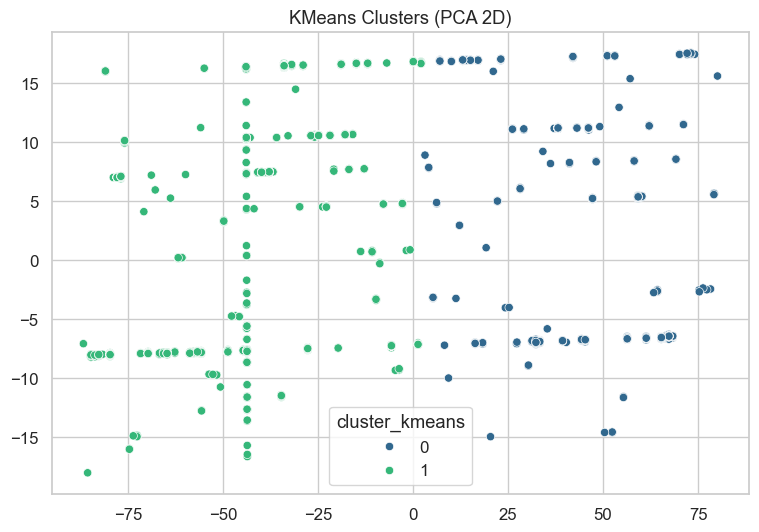

In [40]:
# -------------------------
# 8️⃣ Visualize cluster tốt nhất
# -------------------------
plt.figure(figsize=(9, 6))
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=df_model[cluster_col], palette='viridis')
plt.title(f'{best_cluster} Clusters (PCA 2D)')
plt.show()

## Dùng PySpark

In [41]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("MarketSegmentation") \
    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/11/15 05:01:54 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/11/15 05:01:55 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


TypeError: 'JavaPackage' object is not callable

In [ ]:
spark_df = spark.createDataFrame(df_model)
print(spark_df.printSchema())

root
 |-- id: long (nullable = true)
 |-- Tiêu đề: string (nullable = true)
 |-- Giá: double (nullable = true)
 |-- Khoảng giá min: double (nullable = true)
 |-- Khoảng giá max: double (nullable = true)
 |-- Địa chỉ: string (nullable = true)
 |-- Mô tả chi tiết: string (nullable = true)
 |-- Thương hiệu: string (nullable = true)
 |-- Dòng xe: string (nullable = true)
 |-- Năm đăng ký: double (nullable = true)
 |-- Số Km đã đi: double (nullable = true)
 |-- Tình trạng: string (nullable = true)
 |-- Loại xe: string (nullable = true)
 |-- Dung tích xe: string (nullable = true)
 |-- Xuất xứ: string (nullable = true)
 |-- Chính sách bảo hành: string (nullable = true)
 |-- Trọng lượng: string (nullable = true)
 |-- Href: string (nullable = true)
 |-- Tuổi của xe: double (nullable = true)
 |-- Tiêu đề_normalized: string (nullable = true)
 |-- Mô tả chi tiết_normalized: string (nullable = true)
 |-- Thương hiệu_normalized: string (nullable = true)
 |-- Địa chỉ_normalized: string (nullable = tr

In [ ]:
feature_cols = (
    cat_label_cols +
    cat_ohe_cols +
    num_all_cols
)

# Thêm text features (SVD hoặc TF-IDF)
text_dim = X_text.shape[1]
text_cols = [f"text_feat_{i}" for i in range(text_dim)]

In [ ]:
# Đưa X_text (numpy array) vào df_model
for i in range(text_dim):
    df_model[f"text_feat_{i}"] = X_text[:, i]

spark_df = spark.createDataFrame(df_model)

/tmp/ipython-input-3487321684.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_model[f"text_feat_{i}"] = X_text[:, i]
/tmp/ipython-input-3487321684.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_model[f"text_feat_{i}"] = X_text[:, i]
/tmp/ipython-input-3487321684.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use

In [ ]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols=text_cols + feature_cols,
    outputCol="features"
)

spark_df_vec = assembler.transform(spark_df).select("features")
spark_df_vec.show(5)

+--------------------+
|            features|
+--------------------+
|[0.20598579859872...|
|[0.23877518390668...|
|[0.15844794348125...|
|[0.29922866998985...|
|[0.22105258628672...|
+--------------------+
only showing top 5 rows



In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

sil_scores = []
k_range = range(2, 11)
evaluator = ClusteringEvaluator(predictionCol="prediction", featuresCol="features")

for k in k_range:
    km = KMeans(k=k, seed=42)
    model = km.fit(spark_df_vec)
    preds = model.transform(spark_df_vec)
    sil = evaluator.evaluate(preds)
    sil_scores.append((k, sil))
    print(f"K={k}, Silhouette={sil:.4f}")

# chọn K tối ưu
optimal_k = max(sil_scores, key=lambda x: x[1])[0]
print(f"\n⭐ Optimal K for KMeans (Spark) = {optimal_k}")


K=2, Silhouette=0.8264
K=3, Silhouette=0.7425
K=4, Silhouette=0.6880
K=5, Silhouette=0.6579
K=6, Silhouette=0.6659
K=7, Silhouette=0.6807
K=8, Silhouette=0.5864
K=9, Silhouette=0.7280
K=10, Silhouette=0.6432

⭐ Optimal K for KMeans (Spark) = 2


In [56]:
kmeans = KMeans(k=optimal_k, seed=42)
kmeans_model = kmeans.fit(spark_df_vec)

kmeans_result = kmeans_model.transform(spark_df_vec)

In [ ]:
from pyspark.ml.clustering import GaussianMixture

gmm_sil_scores = []
for k in k_range:
    gmm = GaussianMixture(k=k, seed=42)
    gmm_model = gmm.fit(spark_df_vec)
    preds = gmm_model.transform(spark_df_vec)
    sil = evaluator.evaluate(preds)
    gmm_sil_scores.append((k, sil))
    print(f"GMM k={k}, Silhouette={sil:.4f}")

optimal_gmm_k = max(gmm_sil_scores, key=lambda x: x[1])[0]
print(f"\n⭐ Optimal Components (GMM) = {optimal_gmm_k}")

gmm = GaussianMixture(k=optimal_gmm_k, seed=42)
gmm_model = gmm.fit(spark_df_vec)
gmm_result = gmm_model.transform(spark_df_vec)

GMM k=2, Silhouette=-0.0120
GMM k=3, Silhouette=-0.0529
GMM k=4, Silhouette=-0.0910
GMM k=5, Silhouette=-0.1021
GMM k=6, Silhouette=-0.1679
GMM k=7, Silhouette=-0.2324
GMM k=8, Silhouette=-0.2758
GMM k=9, Silhouette=-0.2841
GMM k=10, Silhouette=-0.1920

⭐ Optimal Components (GMM) = 2


In [ ]:
from pyspark.ml.clustering import BisectingKMeans

bisect_scores = []
for k in k_range:
    bkm = BisectingKMeans(k=k, seed=42)
    bkm_model = bkm.fit(spark_df_vec)
    preds = bkm_model.transform(spark_df_vec)
    sil = evaluator.evaluate(preds)
    bisect_scores.append((k, sil))
    print(f"BisectingKMeans k={k}, Silhouette={sil:.4f}")

optimal_bkm = max(bisect_scores, key=lambda x: x[1])[0]
print(f"\n⭐ Optimal K (Bisecting KMeans) = {optimal_bkm}")

bkm_model = BisectingKMeans(k=optimal_bkm, seed=42).fit(spark_df_vec)
bkm_result = bkm_model.transform(spark_df_vec)


BisectingKMeans k=2, Silhouette=0.8264
BisectingKMeans k=3, Silhouette=0.6985
BisectingKMeans k=4, Silhouette=0.6897
BisectingKMeans k=5, Silhouette=0.6030
BisectingKMeans k=6, Silhouette=0.5801
BisectingKMeans k=7, Silhouette=0.5936
BisectingKMeans k=8, Silhouette=0.5926
BisectingKMeans k=9, Silhouette=0.4624
BisectingKMeans k=10, Silhouette=0.4830

⭐ Optimal K (Bisecting KMeans) = 2


In [57]:
results_spark = pd.DataFrame({
    "Model": ["KMeans", "GMM", "BisectingKMeans"],
    "Silhouette": [
        max(sil_scores, key=lambda x: x[1])[1],
        max(gmm_sil_scores, key=lambda x: x[1])[1],
        max(bisect_scores, key=lambda x: x[1])[1]
    ],
})

print("\n📈 Spark Model Comparison:")
print(results_spark.sort_values("Silhouette", ascending=False))


📈 Spark Model Comparison:
             Model  Silhouette
0           KMeans    0.826427
2  BisectingKMeans    0.826427
1              GMM   -0.012024


In [58]:
kmeans_labels = kmeans_result.select("prediction").toPandas()
gmm_labels = gmm_result.select("prediction").toPandas()
bkm_labels = bkm_result.select("prediction").toPandas()

df_model["spark_kmeans"] = kmeans_labels
df_model["spark_gmm"] = gmm_labels
df_model["spark_bkm"] = bkm_labels

df_model.head()


/tmp/ipython-input-841750839.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_model["spark_kmeans"] = kmeans_labels
/tmp/ipython-input-841750839.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_model["spark_gmm"] = gmm_labels
/tmp/ipython-input-841750839.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe 

,id,Tiêu đề,Giá,Khoảng giá min,Khoảng giá max,Địa chỉ,Mô tả chi tiết,Thương hiệu,Dòng xe,Năm đăng ký,...,text_feat_93,text_feat_94,text_feat_95,text_feat_96,text_feat_97,text_feat_98,text_feat_99,spark_kmeans,spark_gmm,spark_bkm
0,1,"Bán Vespa Sprint 125cc 2024 xanh dương, xe đẹp...",3.111393,3.616844,3.614384,"Phường Bến Thành, Quận 1, Tp Hồ Chí Minh",Bán xe #Vespa Sprint 125cc. Mua mới tại #Topco...,Piaggio,Vespa,1.338812,...,-0.065623,0.082647,0.075198,0.051218,-0.008619,0.049486,0.022955,0.0,1.0,1.0
2,3,CC Vision Thể Thao 2023 Đen+bộ đèn Demi audi A7,1.183363,0.668261,0.666834,"Phường Cầu Kho, Quận 1, Tp Hồ Chí Minh",Chính chủ bán Vision phiên bản Thể Thao 2023 Đ...,Honda,Vision,1.211611,...,-0.073671,-0.012936,0.009496,-0.002196,0.003148,-0.002296,0.031346,0.0,1.0,1.0
3,4,Vespa Sprint 2019 -125- Đen Đỏ Sport -CHÍNH ...,1.715233,1.668117,1.667017,"Phường Bến Nghé, Quận 1, Tp Hồ Chí Minh",XE CÁ NHÂN BÁN - XE DO EM ĐỨNG TÊN CHÍNH C...,Piaggio,Vespa,0.702809,...,0.021322,0.030020,-0.014798,0.071549,-0.030836,-0.053883,-0.004886,1.0,1.0,0.0
4,5,Xe tay ga Yamaha Latte 125 – Đăng ký 2021,0.252590,-0.058787,-0.059341,"Phường Tân Định, Quận 1, Tp Hồ Chí Minh",🛵 Thông tin xe:\n\nDòng xe tay ga cao cấp Yama...,Yamaha,Latte,0.957210,...,0.044624,0.060860,-0.035533,0.038434,-0.085634,-0.057153,-0.166008,1.0,1.0,0.0
5,6,Xe hoc sinh di hoc nay có bằng lái muốn bán lại,-0.777909,-0.673930,-0.673884,"Phường Tân Định, Quận 1, Tp Hồ Chí Minh",Xe cup 50cc không cần bằng lái chay im không h...,SYM,Elegant,0.575609,...,-0.034630,-0.005144,0.000597,0.038028,-0.099169,0.027352,-0.004318,1.0,0.0,0.0
